### Objectifs
- Interroger des sources de données externes
- Analyses de données

#### Exercices
1.  Interrogation de sources de données externes (API)
2.  Effectuer des analyses de données classiques


#### Exercice 1.1

Dans cet exercice, nous examinerons comment télécharger des données à partir
des sources de données externes utilisant des interfaces d'interrogation spéciales. Par exemple, les données ci-dessus ont été obtenues à partir de [Wikidata query](https://query.wikidata.org/) 

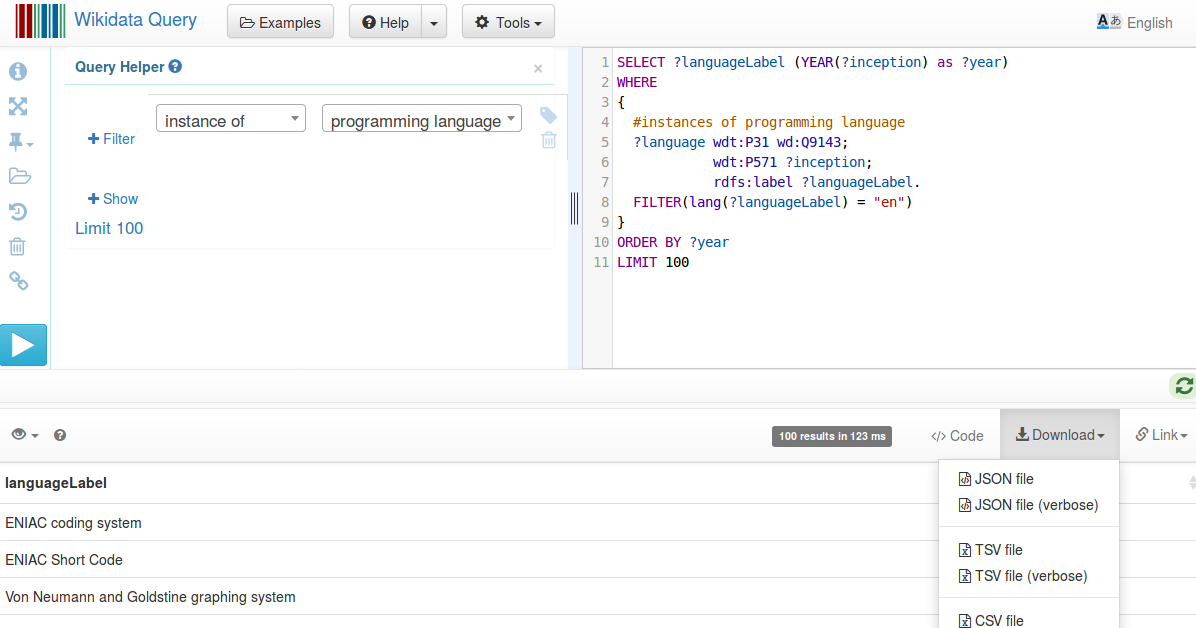

Le premier exercice consiste à obtenir les noms de tous les pays

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?pays ?nom{
  ?pays wdt:P31 wd:Q6256;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr")
}
ORDER by ?nom"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"])

Le prochain exercice consiste à obtenir les noms de tous les lycéees

In [ ]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?pays ?nom{
  ?pays wdt:P31 wd:Q2511322;
        wdt:P17 wd:Q142;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr")
}
ORDER by ?nom"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"])

Votre prochain exercice consiste à trouver les informations suivantes en utilisant Wikidata.
1. Trouvez toutes les régions de France.
2. Trouvez les universités en France.
3. Trouvez les parcs dans votre ville en France.

In [5]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?pays ?nom ?year{
  ?pays wdt:P31 wd:Q11424;
        wdt:P495 wd:Q142;
        wdt:P577 ?date;
        rdfs:label ?nom.
  FILTER(lang(?nom) = "fr" && !wikibase:isSomeValue(?date) )
  BIND(year(?date) as ?year)
}
ORDER by ?year"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result["nom"]["value"], result["year"]["value"])

La Marmite diabolique 1895
Le Moustique récalcitrant 1895
Discussion de Monsieur Janssen et de Monsieur Lagrange 1895
Bois de Boulogne 1896
Bataille de femmes 1896
Ateliers de La Ciotat 1896
place de la comédie 1896
Carmaux, défournage du coke 1896
Bicycliste 1896
Panorama de la place Saint-Marc pris d'un bateau 1896
Jardinier brûlant des herbes 1896
Miss de Vère 1896
Pont suspendu 1896
Parade en l'honneur de l'existence de la Hongrie 1896
Jour de marché à Trouville 1896
Un petit diable 1896
Baignade de chevaux 1896
Baignade dans un torrent 1897
Faust : Apparition de Méphistophélès 1897
Danse serpentine par Mme Bob Walter 1897
Escrime au sabre japonais 1897
Le cabinet de Méphistophélès 1897
Le Pêcheur dans le torrent 1897
Pompiers à Lyon 1897
Mort de Marat 1897
Départ de Jérusalem en chemin de fer 1897
Guillaume Tell 1897
Arrivée de la garde au Palais Royal I 1897
Entrée du château dans le vieux Stockholm 1897
La Mise en croix 1898
L'Aveugle fin de siècle 1898
Chez le magnétiseur 1898


Les Aventures de Robert Macaire 1925
Les Murailles du silence 1925
Sans famille 1925
La Douleur 1925
Le Double Amour 1925
Le Diable dans la ville 1925
L'heure du thé 1925
La Closerie des genêts 1925
L'avocat 1925
Nana 1926
Nana 1926
Rien que les heures 1926
Belphégor 1926
Carmen 1926
Carmen 1926
La Lueur dans les ténèbres 1926
Le P'tit Parigot 1926
La Réponse du destin 1926
Le Bouif errant 1926
Gribiche 1926
Grand Gosse 1926
Les Misérables 1926
Le Juif errant 1926
Jim la Houlette, roi des voleurs 1926
L'Agonie de Jérusalem 1926
La Proie du vent 1926
Sur un air de charleston 1926
Le Faiseur de statuettes 1926
Le Voyage imaginaire 1926
La Terre qui meurt 1926
600 000 francs par mois 1926
En plongée 1926
Lady Harrington 1926
La Femme nue 1926
Graziella 1926
Mauprat 1926
Simone 1926
Simone 1926
Un fils d'Amérique 1926
La Châtelaine du Liban 1926
La Nuit de la revanche 1926
Le Miracle de Lourdes 1926
Mademoiselle Josette, ma femme 1926
Chouchou poids plume 1926
Les Voleurs de gloire 1926
Ni

Un homme sans nom 1932
Miche 1932
La Femme nue 1932
La Chauve-Souris 1932
Sa meilleure cliente 1932
Sous le casque de cuir 1932
Paris-Méditerranée 1932
Le Mariage de Mlle Beulemans 1932
Quick 1932
Quick 1932
La Complice 1932
Le Picador 1932
Le Picador 1932
La femme-poisson 1932
hôtel des étudiants 1932
Aux urnes, citoyens ! 1932
Barranco, Ltd 1932
Maurin des Maures 1932
L'Âne de Buridan 1932
Le Billet de logement 1932
Le Triangle de feu 1932
Mater dolorosa 1932
Laissez faire le temps 1932
La Dame d'en face 1932
L'Affaire Blaireau 1932
Conduisez-moi Madame 1932
Passionnément 1932
Pomme d'amour 1932
La Vagabonde 1932
Mon amant l'assassin 1932
Nicole et sa vertu 1932
Papa sans le savoir 1932
Le Fils improvisé 1932
Coups de roulis 1932
Mon ami Tim 1932
Les Vignes du seigneur 1932
Les Vignes du seigneur 1932
Le Cœur de Paris 1932
Monsieur, Madame et Bibi 1932
La Folle Nuit 1932
Si tu veux 1932
Tu seras duchesse 1932
Le Cordon bleu 1932
Plaisirs de Paris 1932
L'Affaire de la rue Mouffetard 1

Le Monsieur de cinq heures 1938
Les Métallos 1938
Sur les routes d'acier 1938
Prince de mon cœur 1938
Les Rois de la flotte 1938
Chipée 1938
Le Dompteur 1938
La Plus Belle Fille du monde 1938
Trois artilleurs à l'opéra 1938
Jeannette Bourgogne 1938
Marius et Olive à Paris 1938
Les Deux Combinards 1938
L'Escadrille de la chance 1938
Le Plus Beau Gosse de France 1938
Les Bâtisseurs 1938
Durand bijoutier 1938
S.O.S. Sahara 1938
Un meurtre a été commis 1938
Alexis gentleman chauffeur 1938
Les gens du voyage 1938
Ça... c'est du sport 1938
Quand le cœur chante 1938
Les Gaietés de l'exposition 1938
Le Mystère du 421 1938
La Tour de Nesle 1938
Le Cœur ébloui 1938
La Marraine du régiment 1938
L'Avion de minuit 1938
Clodoche 1938
Trois dans un moulin 1938
Monsieur Breloque a disparu 1938
Nuits de princes 1938
Gargousse 1938
Légions d'honneur 1938
Les Femmes collantes 1938
La Vie des artistes 1938
Sommes-nous défendus ? 1938
Champions de France 1938
L'Arabie interdite 1938
Trois artilleurs en vad

Une si jolie petite plage 1949
Toâ 1949
La Louve 1949
La Louve 1949
Le Secret de Mayerling 1949
Le Signal rouge 1949
Singoalla 1949
Le Crime des justes 1949
Orage d'été 1949
Monseigneur 1949
Vire-vent 1949
Piège à hommes 1949
Ainsi finit la nuit 1949
Un trou dans le mur 1949
Maya 1949
Scandale aux Champs-Élysées 1949
Interdit au public 1949
Jo la Romance 1949
Goémons 1949
Mademoiselle de La Ferté 1949
Une femme par jour 1949
La Passagère 1949
Le Sorcier du ciel 1949
Ève et le serpent 1949
Le Bal des pompiers 1949
Le Bout de la route 1949
Mission à Tanger 1949
Le Dernier Quart d'heure 1949
L'Inconnue n°13 1949
Le Mystère Barton 1949
Ceux du Tchad 1949
Marlène 1949
Les Orphelins de Saint-Vaast 1949
L'échafaud peut attendre 1949
L'Homme aux mains d'argile 1949
Deux amours 1949
L'Inconnu d'un soir 1949
Le Martyr de Bougival 1949
56 rue Pigalle 1949
Valse brillante 1949
Fandango 1949
Tous les deux 1949
L'Extravagante Théodora 1949
Seul... à corps perdu 1949
Ces dames aux chapeaux verts 1949

Une manche et la belle 1957
Ça aussi c'est Paris 1957
Tous peuvent me tuer 1957
Sénéchal le magnifique 1957
À pied, à cheval et en voiture 1957
Notre-Dame, cathédrale de Paris 1957
Les Fanatiques 1957
Élisa 1957
Pot-Bouille 1957
Une ville pas comme les autres 1957
Vacances explosives 1957
Lettre de Sibérie 1957
Œil pour œil 1957
Amore e chiacchiere 1957
Quand le rideau se lève 1957
Mademoiselle Strip-tease 1957
Mort en fraude 1957
La Garçonne 1957
Le Septième Commandement 1957
Le Feu aux poudres 1957
Nathalie 1957
Niok l'éléphant 1957
Les Lavandières du Portugal 1957
Le Grand Bluff 1957
Méfiez-vous fillettes 1957
Mademoiselle et son gang 1957
USA en vrac 1957
Miss Catastrophe 1957
Pas de grisbi pour Ricardo 1957
Printemps à Paris 1957
Paris clandestin 1957
Ce sacré Amédée 1957
Bonsoir Paris, bonjour l'amour 1957
À la Jamaïque 1957
Isabelle a peur des hommes 1957
L'Aventurière des Champs-Élysées 1957
Une nuit aux Baléares 1957
Paris Music Hall 1957
Quelle sacrée soirée 1957
Sylviane de 

Mourir à Madrid 1963
Un roi sans divertissement 1963
Hercule contre Moloch 1963
À cause, à cause d'une femme 1963
À couteaux tirés 1963
14-18 1963
Chroniques turques 1963
Scaramouche 1963
À la française 1963
L'Aigle de Florence 1963
Le Signe de Zorro 1963
Une femme est passée 1963
Un drôle de paroissien 1963
Les Révoltées de l'Albatros 1963
Les Révoltées de l'Albatros 1963
Au cœur de la vie 1963
Twist Parade 1963
Le Captif 1963
La Prostitution 1963
Jusqu'au bout du monde 1963
Symphonie pour un massacre 1963
fort du fou 1963
Les Saintes Nitouches 1963
Le Journal d'un fou 1963
Les Cavaliers de la terreur 1963
La Mémoire courte 1963
Transit à Saïgon 1963
Le cave est piégé 1963
Kriss Romani 1963
Capitaine Singrid 1963
À l'aube du troisième jour 1963
Le Mannequin de Belleville 1963
Hold-up à Saint-Trop' 1963
Règlements de comptes 1963
L'espionne sera à Nouméa 1963
Les Parapluies de Cherbourg 1964
Cent mille dollars au soleil 1964
Le Train 1964
Les Poupées 1964
Angélique, marquise des anges 

Peau d'âne 1970
Hoa-Binh 1970
Hoa-Binh 1970
Hoa-Binh 1970
Hoa-Binh 1970
Hoa-Binh 1970
Hoa-Binh 1970
Hoa-Binh 1970
Le Clan des Siciliens 1970
La Califfa 1970
Bathroom 1970
La Rupture 1970
Le Boucher 1970
Le Cercle rouge 1970
Le Distrait 1970
Le Passager de la pluie 1970
Paul et Michelle 1970
Camarades 1970
Clodo 1970
La Horse 1970
Elle boit pas, elle fume pas, elle drague pas, mais... elle cause ! 1970
La Maison des bories 1970
Caïn de nulle part 1970
Céleste 1970
L'Ardoise 1970
Les Fleurs du soleil 1970
La Liberté en croupe 1970
La Maison 1970
La Dernière Croisade 1970
Le Mur de l'Atlantique 1970
La Rose écorchée 1970
Le Cinéma de papa 1970
La Nuit bulgare 1970
Le Bal du comte d'Orgel 1970
Du côté d'Orouët 1970
Les Novices 1970
La Pacifista 1970
Le Maître du temps 1970
La Promesse de l'aube 1970
Le Champignon 1970
L'Eden et après 1970
Le Lit de la Vierge 1970
Le Petit Bougnat 1970
Et qu'ça saute 1970
L'Invasion 1970
Le Dernier Saut 1970
Le Diamant 1970
La Faute de l'abbé Mouret 1970
La

L'Autre France 1977
Le Gendarme et les Extra-terrestres 1978
La Carapate 1978
Le Dossier 51 1978
In girum imus nocte et consumimur igni 1978
Les Raisins de la mort 1978
Fedora 1978
Les Bronzés 1978
L'Argent des autres 1978
L'Amour en fuite 1978
Une souris chez les hommes 1978
La Fille 1978
La Fille 1978
Cinématon 1978
La Cage aux folles 1978
La Grande Menace 1978
La Grande Cuisine 1978
Les lycéennes redoublent 1978
Les lycéennes redoublent 1978
Robert et Robert 1978
Robert et Robert 1978
Molière 1978
Je suis timide mais je me soigne 1978
Je suis timide mais je me soigne 1978
Je suis timide mais je me soigne 1978
Les Liens de sang 1978
Les Liens de sang 1978
La Chanson de Roland 1978
Bordel SS 1978
La Chambre verte 1978
Sans anesthésie 1978
Une histoire simple 1978
Le Pion 1978
Rêve de singe 1978
Sonate d'automne 1978
Brigade mondaine 1978
La Zizanie 1978
La Zizanie 1978
La Zizanie 1978
La Zizanie 1978
La Zizanie 1978
La Zizanie 1978
Violette Nozière 1978
Violette Nozière 1978
Préparez 

Just the Way You Are 1984
Le Succès à tout prix 1984
Premiers Désirs 1984
Premiers Désirs 1984
Emmanuelle 4 1984
Emmanuelle 4 1984
Un dimanche à la campagne 1984
Le Monstre de l'océan rouge 1984
L'Été meurtrier 1984
Viva la vie 1984
Un amour de Swann 1984
Un amour de Swann 1984
Benvenuta 1984
Barres 1984
Prénom Carmen 1984
Boy Meets Girl 1984
Hécate, maîtresse de la nuit 1984
Gwendoline 1984
Gwendoline 1984
Ananas 1984
Bayan ko: Kapit sa patalim 1984
Rive droite, rive gauche 1984
Les Rats de Manhattan 1984
Les Rats de Manhattan 1984
Femmes de personne 1984
Clémentine Tango 1984
Clémentine Tango 1984
L'Arbalète 1984
Cuore 1984
Joyeuses Pâques 1984
Le Mystère Alexina 1984
7p., cuis., s. de b., ... à saisir 1984
Les Voleurs de la nuit 1984
Les Trottoirs de Bangkok 1984
Les Amants terribles 1984
Yor, le chasseur du futur 1984
Kaos 1984
Notre histoire 1984
Ave Maria 1984
Le Bal 1984
La Crime 1984
Le Cowboy 1984
Les Années déclic 1984
La Boule 1984
Le Cheval de fer 1984
Le Matelot 512 1984
L

African Timber 1989
Le Désir en ballade 1989
Site 2 1989
Doux amer 1989
Les Almées, danseuses orientales 1989
Elli Fat Mat 1989
La Vallée des anges 1989
Papa est parti, maman aussi 1989
Boulevards d'Afrique 1989
Blancs cassés 1989
Rouget le braconnier 1989
Thank You Satan 1989
La voce della luna 1990
La voce della luna 1990
La voce della luna 1990
Cyrano de Bergerac 1990
Nouvelle Vague 1990
Nouvelle Vague 1990
Atto di dolore 1990
Conte de printemps 1990
Conte de printemps 1990
Europa Europa 1990
Mes nuits sont plus belles que vos jours 1990
Le Voyage du capitaine Fracasse 1990
Il y a des jours... et des lunes 1990
Un dieu rebelle 1990
Oublier Palerme 1990
Oublier Palerme 1990
Noce blanche 1990
Docteur M 1990
Docteur M 1990
Jours tranquilles à Clichy 1990
Jours tranquilles à Clichy 1990
J'ai engagé un tueur 1990
Les Mille et Une Nuits 1990
Korczak 1990
Les Branches de l'arbre 1990
Alberto Express 1990
Le Raccourci 1990
Alexandrie encore et toujours 1990
Le Voleur d'arc-en-ciel 1990
Paci

True Romance 1994
Stargate, la porte des étoiles 1994
Soleil trompeur 1994
Qui a tué le chevalier ? 1994
Germinal 1994
Killing Zoe 1994
Killing Zoe 1994
Little Buddha 1994
Val Abraham 1994
My Father, ce héros 1994
My Father, ce héros 1994
Le Radeau de La Méduse 1994
Le Parfum de Mathilde 1994
Bonsoir 1994
Astérix et les Indiens 1994
Mario et le Magicien 1994
Mario et le Magicien 1994
Nostradamus 1994
Nostradamus 1994
Le Parfum d'Yvonne 1994
Le Parfum d'Yvonne 1994
Lisbonne Story 1994
Action mutante 1994
La vie à rebours 1994
Dellamorte Dellamore 1994
Dellamorte Dellamore 1994
Un Indien dans la ville 1994
La Maison aux esprits 1994
Le Rêve du papillon 1994
Bolt 1994
Le Colonel Chabert 1994
Trois couleurs : Blanc 1994
Trois couleurs : Blanc 1994
Trois couleurs : Blanc 1994
L'Enfer 1994
Grosse Fatigue 1994
Before the Rain 1994
Prêt-à-porter 1994
La Reine Margot 1994
La Reine Margot 1994
Journal intime 1994
Barnabo des montagnes 1994
Bab El-Oued City 1994
Les Leningrad Cowboys rencontrent 

Le Monde à l'envers 1998
Si je t'aime, prends garde à toi 1998
Tueur à gages 1998
Tueurs de petits poissons 1998
Un dentiste exemplaire 1998
Trop (peu) d'amour 1998
Vive la mariée... et la libération du Kurdistan 1998
Max et Bobo 1998
Zone rouge 1998
Bingo! 1998
Quelque chose d'organique 1998
Sentimental Education 1998
Mossane (film) 1998
Le Comptoir 1998
À la recherche du paradis perdu 1998
La Coupe De La Gloire: The Official Film of the 1998 FIFA World Cup 1998
Voleur de vie 1998
Brute 1998
Julie est amoureuse 1998
L'Amitié 1998
Dormez, je le veux ! 1998
Don Juan 1998
Riches, belles, etc. 1998
Sucre amer 1998
Un grand cri d'amour 1998
Terror of Prehistoric Bloody Creature from Space 1998
The Old Place 1998
The Shade 1998
Alegría 1998
L'Examen de minuit 1998
Ça ne se refuse pas 1998
Vivre au paradis 1998
Sale Battars 1998
Michael Kael contre la World News Company 1998
Mille et un rêves 1998
Claire Dolan 1998
L'Annonce faite à Marius 1998
Carnavallée 1998
Pièces d'identités 1998
L'Arri

Balzac et la Petite Tailleuse chinoise 2002
Semana Santa 2002
Les Lundis au soleil 2002
Au plus près du paradis 2002
Demonlover 2002
L'Homme du train 2002
Nous n'irons plus au bois 2002
Parlez-moi d'amour 2002
Little Senegal 2002
Le Gourou et les Femmes 2002
Le Fils 2002
Les Autres 2002
Ah ! si j'étais riche 2002
Le Principe de l'incertitude 2002
Ma vraie vie à Rouen 2002
Chansons du deuxième étage 2002
17 fois Cécile Cassard 2002
1974, une partie de campagne 2002
300 jours de colère 2002
Apartment 5C 2002
Abouna 2002
Fellini, je suis un grand menteur 2002
Femmes en miroir 2002
La Guerre à Paris 2002
Arrêt d'urgence 2002
El Bonaerense 2002
Comme un avion 2002
La Maîtresse en maillot de bain 2002
Cavale 2002
Dans ma peau 2002
Long Way Home 2002
The Abduction Club 2002
Carnages 2002
Carrément à l'ouest 2002
La Repentie 2002
Le Nouveau Jean-Claude 2002
A+ Pollux 2002
Blanche 2002
Kedma 2002
Le Chignon d'Olga 2002
Le Bruit, l'Odeur et Quelques Étoiles 2002
Le Papillon 2002
Madame Satã 2002

Kilomètre zéro 2006
Zaïna, cavalière de l'Atlas 2006
Lady Chatterley 2006
La Science des rêves 2006
La Science des rêves 2006
Cosmic Connexion 2006
La Planète blanche 2006
La Planète blanche 2006
Mon colonel 2006
Moolaadé 2006
Munich 2006
Silent Hill 2006
Silent Hill 2006
Je vais bien, ne t'en fais pas 2006
Southland Tales 2006
Au nom de la liberté 2006
Les Clefs de la maison 2006
Bamako 2006
Appelez-moi Kubrick 2006
Golden Door 2006
Si le vent soulève les sables 2006
Odette Toulemonde 2006
Daft Punk's Electroma 2006
Taxidermie 2006
Mise à prix 2006
Le vent se lève 2006
Le vent se lève 2006
Les Chevaliers du ciel 2006
Bandidas 2006
Bandidas 2006
Marie-Antoinette 2006
Marie-Antoinette 2006
Quand j'étais chanteur 2006
La Vallée des fleurs 2006
Le Secret 2006
La Tourneuse de pages 2006
Le Dernier Trappeur 2006
Klimt 2006
Klimt 2006
Half Moon 2006
Babel 2006
Babel 2006
Daratt 2006
Hors de prix 2006
Cœurs 2006
Le Direktør 2006
La Terre vue du ciel 2006
Ô Jérusalem 2006
Un crime 2006
Aaltra 

Secret défense 2008
Nuit de chien 2008
Chants des mers du sud 2008
La Vie moderne 2008
Chimère 2008
Versailles 2008
La Femme invisible 2008
Les Bureaux de Dieu 2008
J'ai rêvé sous l'eau 2008
Tamanrasset 2008
Soit je meurs, soit je vais mieux 2008
Tabarly 2008
Le Premier Jour du reste de ta vie 2008
Les Femmes de l'ombre 2008
Le Premier Venu 2008
Une histoire louche 2008
Une mort de style colonial 2008
Humeurs et Rumeurs 2008
Modern Love 2008
J'irai dormir à Hollywood 2008
Picnic 2008
Sur ta joue ennemie 2008
Country Teacher 2008
La Citadelle assiégée 2008
Home Sweet Home 2008
Tengri, le bleu du ciel 2008
Tengri, le bleu du ciel 2008
Un cœur simple 2008
Le Roi de l'évasion 2008
Une chanson dans la tête 2008
Ça se soigne ? 2008
Plus tard tu comprendras 2008
Starko ! la saison 1 2008
Story of Jen 2008
Leur morale... et la nôtre 2008
Lights and Shadows 2008
Le crime est notre affaire 2008
Mambety For Ever 2008
Made in Italy 2008
Je ne suis pas morte 2008
The Amazing Truth About Queen Raque

Une Chinoise 2010
Une Chinoise 2010
Robert Mitchum est mort 2010
Un balcon sur la mer 2010
Notre étrangère 2010
Persécution 2010
IROCK 2010
Petit Tailleur 2010
Toscan 2010
Ça commence par la fin 2010
Holiday 2010
La Rivière Tumen 2010
Indigène d'Eurasie 2010
Les Yeux ouverts 2010
Le Rapport Karski 2010
Une bouteille à la mer 2010
Une exécution ordinaire 2010
Pièce montée 2010
Pleure en silence 2010
Tout ce qui brille 2010
Streamfield, les carnets noirs 2010
Il reste du jambon ? 2010
Imogène McCarthery 2010
Une vie tranquille 2010
Libre échange 2010
Mon pote 2010
Le Fossé 2010
Les Gens d'en-bas 2010
Mano de dios 2010
Je ne vous oublierai jamais 2010
Une nuit au cirque 2010
Une petite zone de turbulences 2010
Une pute et un poussin 2010
Toutes les filles pleurent 2010
Condamnations 2010
Le Voleur de lumière 2010
La Fête des voisins 2010
Le Sentiment de la chair 2010
Le Siffleur 2010
Severn, la voix de nos enfants 2010
No et moi 2010
Les Larmes de l'émigration 2010
Aurora 2010
Opération 1

Elle s'en va 2013
Elle s'en va 2013
Alceste à bicyclette 2013
Alceste à bicyclette 2013
Alceste à bicyclette 2013
La Petite Venise 2013
La Petite Venise 2013
Diana 2013
Diana 2013
Diana 2013
Boule et Bill 2013
Blancanieves 2013
Upside Down 2013
Sur la route 2013
Le Théorème Zéro 2013
A.C.A.B.: All Cops Are Bastards 2013
Do Not Disturb 2013
Dors mon lapin 2013
Laurence Anyways 2013
Play 2013
No 2013
No 2013
Un heureux événement 2013
Le Prénom 2013
Paranoia 2013
Paranoia 2013
Paranoia 2013
Après mai 2013
Après mai 2013
Bowling 2013
Le Grand Soir 2013
Only God Forgives 2013
Only God Forgives 2013
Only God Forgives 2013
Angélique 2013
Malavita 2013
Malavita 2013
Malavita 2013
Au-delà des collines 2013
Au bonheur des ogres 2013
Au bonheur des ogres 2013
Au bout du conte 2013
Au bout du conte 2013
Au bout du conte 2013
Shadow Dancer 2013
Après la bataille 2013
100% cachemire 2013
El muerto y ser feliz 2013
La Marque des anges 2013
La Marque des anges 2013
La Terre outragée 2013
Inside Llewyn

Ceremony Brazza 2014
Les Tourmentes 2014
Fidelio, l'odyssée d'Alice 2014
La Ligne de partage des eaux 2014
Le scaphandrier 2014
Sweet Cocoon 2014
Héritages 2014
Héritages 2014
Amir & Amira 2014
4:48 2014
Autoportrait sans moi 2014
Tout est faux 2014
Le Chercheur inquiet 2014
Les Révoltés 2014
The Voice Thief 2014
La Dune 2014
La Dune 2014
Fastlife 2014
New Territories 2014
One Deep Breath 2014
L'Odyssée sauvage 2014
K-nada 2014
Steak (R)évolution 2014
Le serment des Hitler 2014
Bébé tigre 2014
La ligne de partage des eaux 2014
Parenthèse 2014
Motu Maeva 2014
Prendre l'air 2014
La Cérémonie 2014
1914, le Secret de Confrécourt 2014
Le Jour de la comète 2014
Le Soldat méconnu 2014
Argerich 2014
Comme une grande 2014
Kommunisten 2014
Exil 2014
Faux Accords 2014
GHB 2014
GHB 2014
Le Corniaud 2015
Le Petit Nicolas 2015
Le Petit Nicolas 2015
Moloch Tropical 2015
Le Fils de l'autre 2015
Le Capital 2015
Le Dernier des injustes 2015
Journal d'une femme de chambre 2015
Journal d'une femme de cham

Stefan Zweig, adieu l'Europe 2016
L'Idéal 2016
Le Divan du monde 2016
Les Seigneurs d'Outre Monde 2016
Allegro ma troppo 2016
Le Fils de Joseph 2016
La Tragédie des Brigades Internationales 2016
Les Rues de Pantin 2016
Père fils thérapie ! 2016
Enfin des bonnes nouvelles 2016
Wùlu 2016
Sex Doll 2016
Cigarettes et Chocolat chaud 2016
Lutine 2016
For This Is My Body 2016
Salafistes 2016
Le Potager de mon grand-père 2016
L’intérêt général et moi 2016
Vers la tendresse 2016
Un Paese di Calabria 2016
Le Secret des banquises 2016
Les Saisons 2016
Les Saisons 2016
Des nouvelles de la planète Mars 2016
Des nouvelles de la planète Mars 2016
Les Naufragés 2016
Illégitime 2016
Illégitime 2016
Le Cancre 2016
La Route d'Istanbul 2016
Le Chant du merle 2016
Éperdument 2016
Argent amer 2016
Le Maitre de la Mort 2016
La Prunelle de mes yeux 2016
La Pièce : Les derniers seront les premiers 2016
Le Cœur en braille 2016
Le Cœur en braille 2016
Jamais contente 2016
Inside 2016
Le Fantôme de Canterville 20

Sibel 2018
Sibel 2018
M 2018
Les Étendues imaginaires 2018
L'homme fidèle 2018
Le maître est l'enfant 2018
What You Gonna Do When the World's on Fire? 2018
Break 2018
Cadavre exquis 2018
Ces traces qui restent 2018
Cyclistes 2018
Dans la peau de Thomas Pesquet 2018
Un tramway à Jérusalem 2018
Duelles 2018
Intérieur 2018
Un peuple et son roi 2018
Un peuple et son roi 2018
Vaurien 2018
Vierges 2018
En mille morceaux 2018
Vous êtes jeunes, vous êtes beaux 2018
Le Cercle littéraire de Guernesey 2018
Le Cercle littéraire de Guernesey 2018
Regarde-moi 2018
Eva 2018
Le Monde ou rien 2018
Deux fils 2018
12 jours 2018
Le Gendre de ma vie 2018
Mia et le Lion Blanc 2018
Sophia Antipolis 2018
Taxi 5 2018
Taxi 5 2018
Taxi 5 2018
Je vais mieux 2018
Jeune Femme 2018
I Am Not a Witch 2018
The House that Jack Built 2018
The House that Jack Built 2018
Sergio Leone, une Amérique de légende 2018
Les Fantômes 2018
Lola et ses frères 2018
Guy 2018
Les Bonnes Manières 2018
9 doigts 2018
Tout le monde debout 

In [3]:
results

{'head': {'vars': ['pays', 'nom', 'year']},
 'results': {'bindings': [{'pays': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q55596695'},
    'nom': {'xml:lang': 'fr',
     'type': 'literal',
     'value': 'Donne-moi des ailes'}},
   {'pays': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q59732735'},
    'nom': {'xml:lang': 'fr', 'type': 'literal', 'value': 'Féeries nues'}},
   {'pays': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q59733063'},
    'nom': {'xml:lang': 'fr',
     'type': 'literal',
     'value': "Flagrant délit d'adultère"}},
   {'pays': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q59733154'},
    'nom': {'xml:lang': 'fr',
     'type': 'literal',
     'value': 'Les Filles de Loth'}},
   {'pays': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q59733425'},
    'nom': {'xml:lang': 'fr',
     'type': 'literal',
     'value': 'La Femme au portrait'}},
   {'pays': {'type': 'uri',
     'value': 'h